In [1]:
import warnings
warnings.filterwarnings("ignore")

# loading packages

import numpy as np
import pandas as pd
from pandas import datetime
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs

sns.set_style("darkgrid")
%matplotlib inline

import mlflow
import mlflow.sklearn
import scipy.stats as scs
import statsmodels.api as sm

import logging

import dvc.api

In [60]:
Format = '%(levelname)s %(asctime)s - %(message)s'
logging.basicConfig(filename= r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\Notebook\EDA.log',
level =logging.INFO,
format = Format)
logger = logging.getLogger()

## Loading Datasets

In [9]:
mlflow.set_experiment('pharma sales')

In [3]:
#Get url from DVC

path = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\store.csv'
repo = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction'
version = 'v3'

data_url = dvc.api.get_url(

    path = path,
    repo = repo,
    rev = version

)
logger.info('first log loading data from dvc')

In [4]:
store = pd.read_csv(data_url,sep=',')
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
#Get url from DVC

path = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\train.csv'
repo = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction'
version = 'v1'

data_url2 = dvc.api.get_url(

    path = path,
    repo = repo,
    rev = version

)

In [6]:
train = pd.read_csv(data_url2,sep=',')
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
#Get url from DVC

path = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction\data\test.csv'
repo = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\PharmaceuticalSalesPrediction'
version = 'v3'

data_url3 = dvc.api.get_url(

    path = path,
    repo = repo,
    rev = version

)

In [8]:
test = pd.read_csv(data_url3,sep=',')
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
mlflow.log_param("data_url", data_url)
mlflow.log_param("data_version", version)
mlflow.log_metric("input_rows", data.shape[0])
mlflow.log_metric("input_cols", data.shape[1])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We are going to join the datasets, through an inner join an inner join 

In [13]:
# merge the train with the stores set
train_store = pd.merge(left = train, right = store, how = 'inner', left_on = 'Store', right_on = 'Store')
print(train_store.shape)
#print(test_store.shape)

(1017209, 18)


In [14]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The pharmaceutical dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_store)

The pharmaceutical dataset contains 11.87 % missing values.


In [15]:
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

as part of prepocessing we will generate new columns for the date. we will unpark every part of the date into a new column this will help in ploting.

In [16]:
def feature_generation(data):
    data['Date'] = pd.to_datetime(data.Date)
    data['Month'] = data.Date.dt.month.to_list()
    data['Year'] = data.Date.dt.year.to_list()
    data['Day'] = data.Date.dt.day.to_list()
    data['WeekOfYear'] = data.Date.dt.weekofyear.to_list()
    data['DayOfWeek'] = data.Date.dt.dayofweek.to_list()
    data['weekday'] = 1        # Initialize the column with default value of 1
    data.loc[data['DayOfWeek'] == 5, 'weekday'] = 0
    data.loc[data['DayOfWeek'] == 6, 'weekday'] = 0
#         data = data.drop(['Date'], axis = 1)
        
    return data

In [17]:
train_dup = train_store.copy()
train_dup

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [18]:
train_dup=feature_generation(train_dup) 
train_dup 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,weekday
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,2015,31,31,1
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,2015,30,31,1
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,2015,29,31,1
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,2015,28,31,1
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,2015,27,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,d,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,5,1,0
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,d,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,4,1,1
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,d,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,3,1,1
1017207,1115,2,2013-01-02,3697,305,1,0,0,1,d,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,2,1,1


We will also fill the nan values of the numerical columns with there mean and categorical columns with there mode 

In [19]:
for col in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']:
    train_dup[col] = train_dup[col].fillna((int(train_dup[col].mean()))) 



In [20]:
train_dup['PromoInterval'] = train_dup['PromoInterval'].fillna(train_dup['PromoInterval'].mode()[0])

In [21]:
train_dup.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,2.998341,1.997391,0.0,1.0,3.0,5.0,6.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5430.085430,7705.297659,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,7.152022,2.654703,1.0,6.0,7.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,2008.470820,4.959791,1900.0,2008.0,2008.0,2011.0,2015.0


Text(0.5, 1.0, 'Average sales per month')

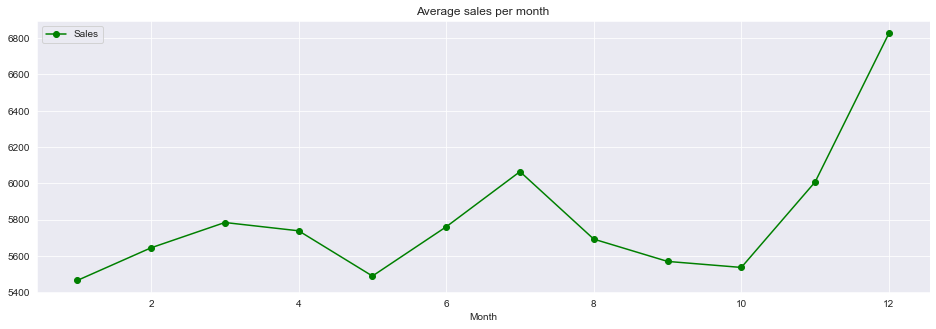

In [22]:
axis = train_dup.groupby('Month')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'g')
axis.set_title('Average sales per month')

From the plot above we can say that high sales are experienced in the month of December

Text(0.5, 1.0, 'Average Customers per month')

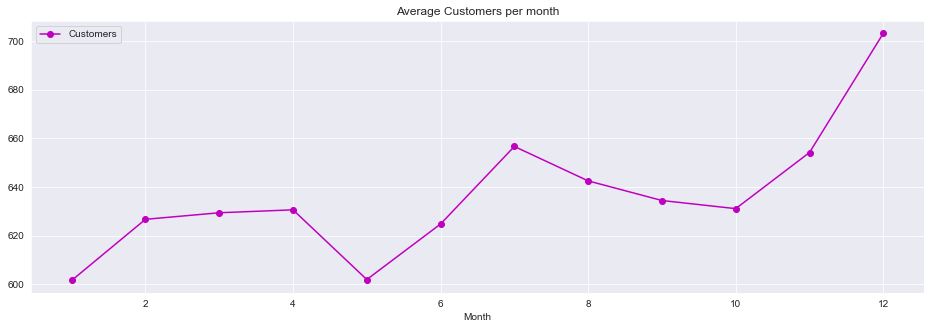

In [23]:
axis = train_dup.groupby('Month')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'm')
axis.set_title('Average Customers per month')

Text(0.5, 1.0, 'Average Sales per Day')

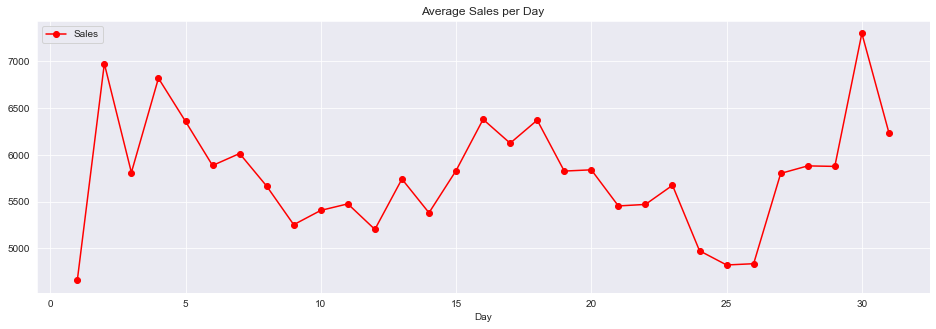

In [24]:
axis = train_dup.groupby('Day')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'r')
axis.set_title('Average Sales per Day')

Text(0.5, 1.0, 'Average Customers per day')

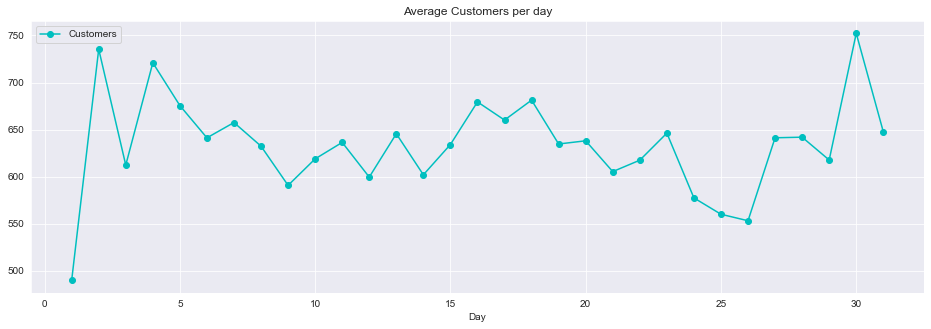

In [25]:
axis = train_dup.groupby('Day')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'c')
axis.set_title('Average Customers per day')

Text(0.5, 1.0, 'Average sales per day of the week')

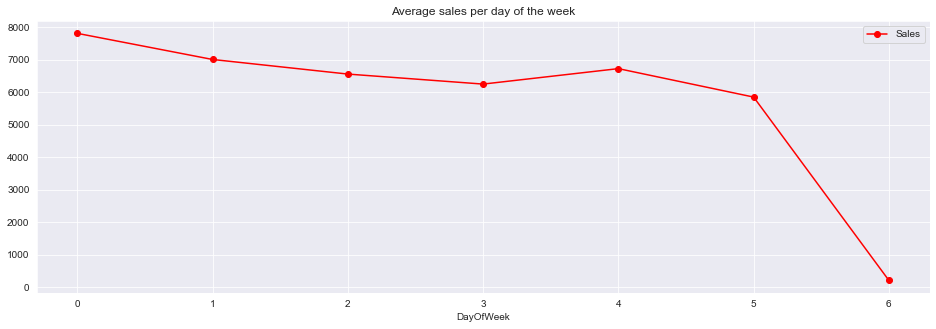

In [26]:
axis = train_dup.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'r')
axis.set_title('Average sales per day of the week')

in the plot above 0 = monday , 1 = tuesday , 2 = wednesday , 3= thursday , 4 = friday , 5 = saturday , 6 = sunday 
it is evident that most people dont shop on sundays 

Text(0.5, 1.0, 'Average customers per day of the week')

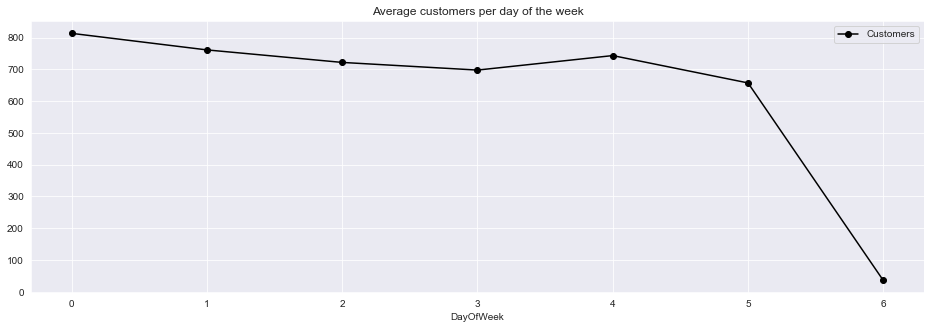

In [27]:
axis = train_dup.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (16,5), marker = 'o', color = 'k')
axis.set_title('Average customers per day of the week')

<AxesSubplot:xlabel='Date'>

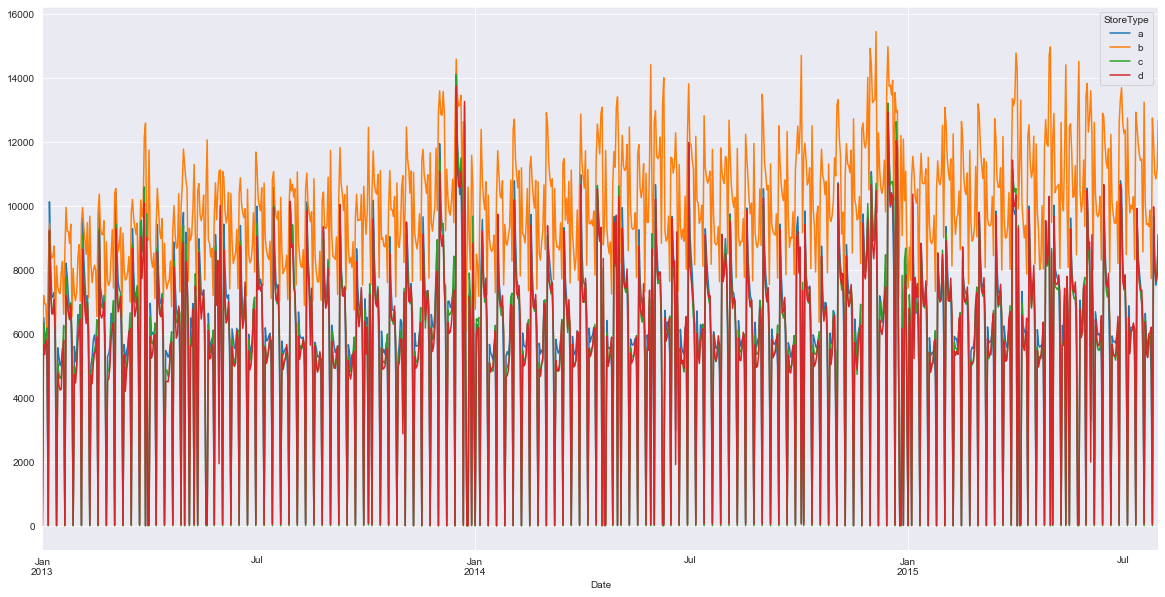

In [28]:
fig, ax = plt.subplots(figsize = (20,10))
train_dup.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

In [29]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

Checking for sales and customer behaviour during holidays and ordinary days.

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
so we first plot holiday plot and count how many are 0 , a , b, c 

then we plot a bar graph for Holidays and sales , where holiday is not equal to 0 and sales are greater than 0 

we will use the same thinking on ploting the customer column and holiday , we will plot where holiday is not equaal to 0 and customer is greater than on 

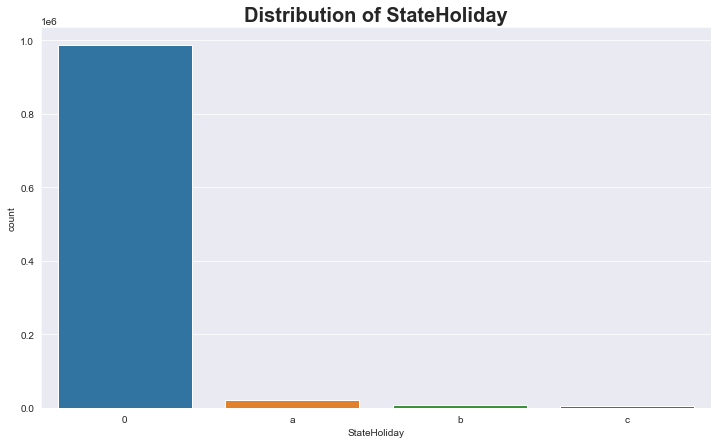

In [30]:
train_dup["StateHoliday"].loc[train_dup["StateHoliday"] == 0] = "0"
plot_count(train_dup,'StateHoliday')

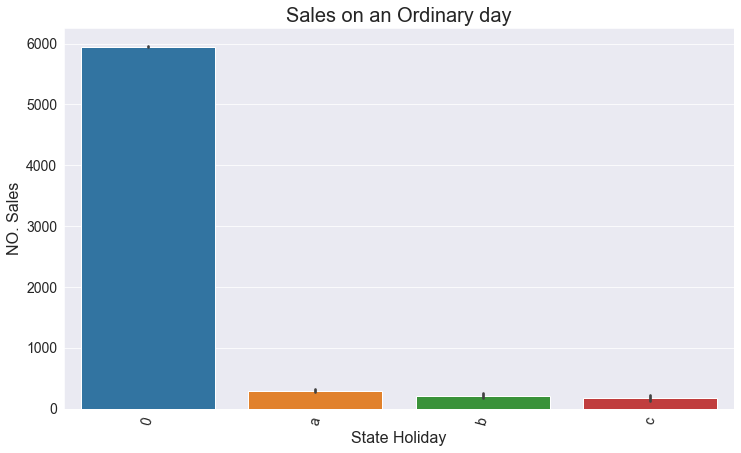

In [31]:
plot_bar(train_dup,'StateHoliday','Sales','Sales on an Ordinary day','State Holiday','NO. Sales')

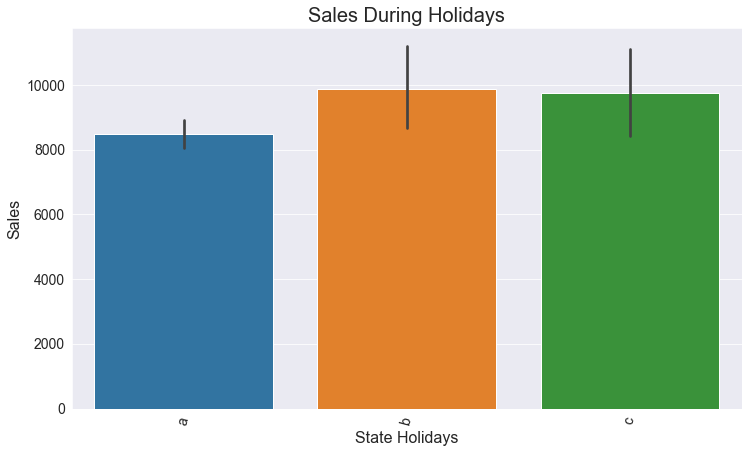

In [32]:
holiday = (train_dup["StateHoliday"] != "0") & (train_dup["Sales"] > 0)
plot_bar(train_dup[holiday],'StateHoliday','Sales','Sales During Holidays','State Holidays','Sales')

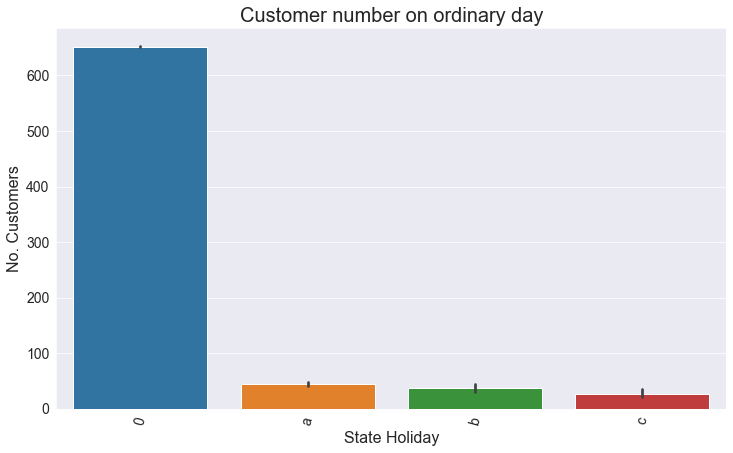

In [33]:
plot_bar(train_dup,'StateHoliday','Customers','Customer number on ordinary day','State Holiday','No. Customers')

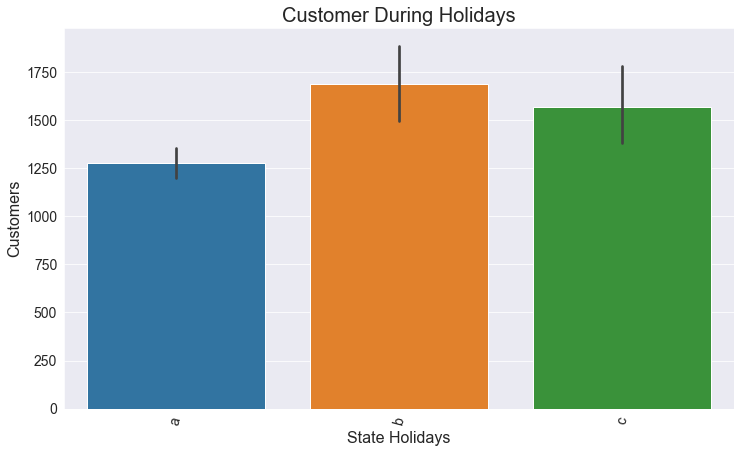

In [34]:
holiday = (train_dup["StateHoliday"] != "0") & (train_dup["Customers"] > 0)
plot_bar(train_dup[holiday],'StateHoliday','Customers','Customer During Holidays','State Holidays','Customers')

From above most customers shop on easter holiday then christmas 

 we can aslo Check how the storetype type affects sales

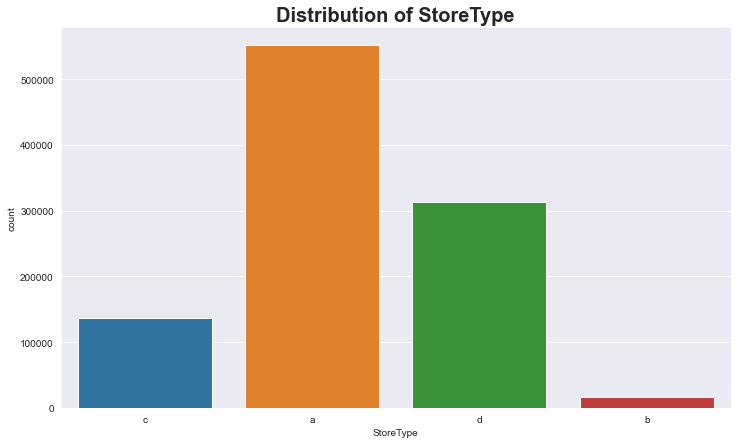

In [35]:
plot_count(train_dup,'StoreType')

We can see most stores areof type a

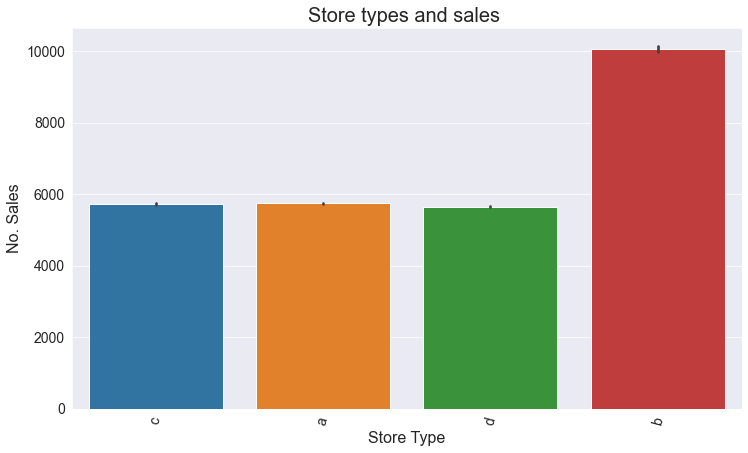

In [36]:
plot_bar(train_dup,'StoreType','Sales','Store types and sales ','Store Type','No. Sales',)

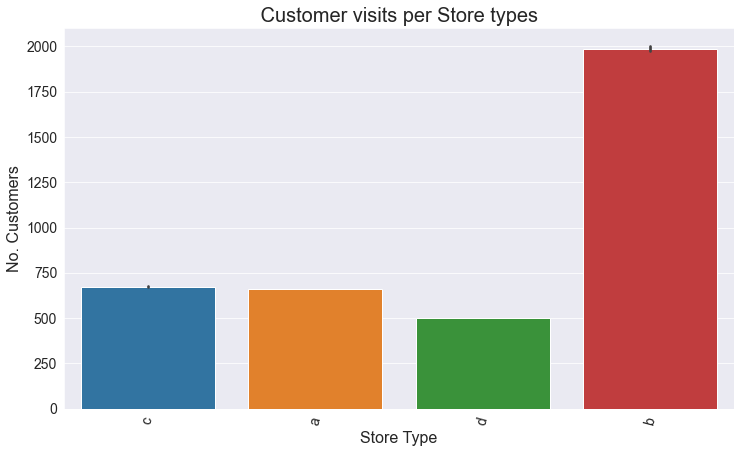

In [37]:
plot_bar(train_dup,'StoreType','Customers',' Customer visits per Store types ','Store Type','No. Customers',)

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

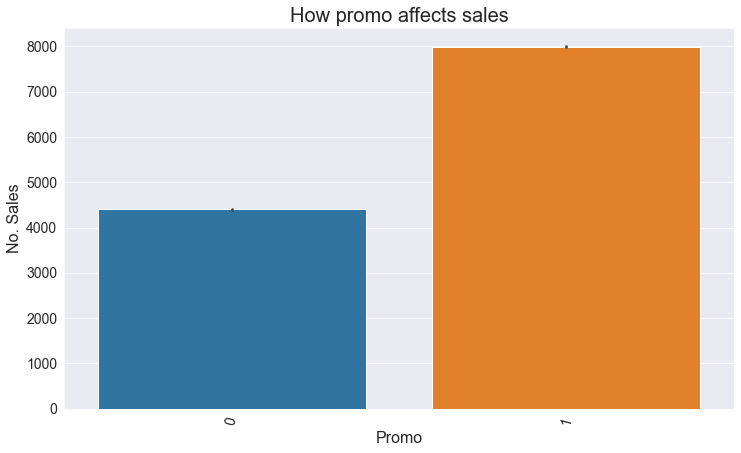

In [38]:
plot_bar(train_dup,'Promo','Sales','How promo affects sales','Promo','No. Sales')

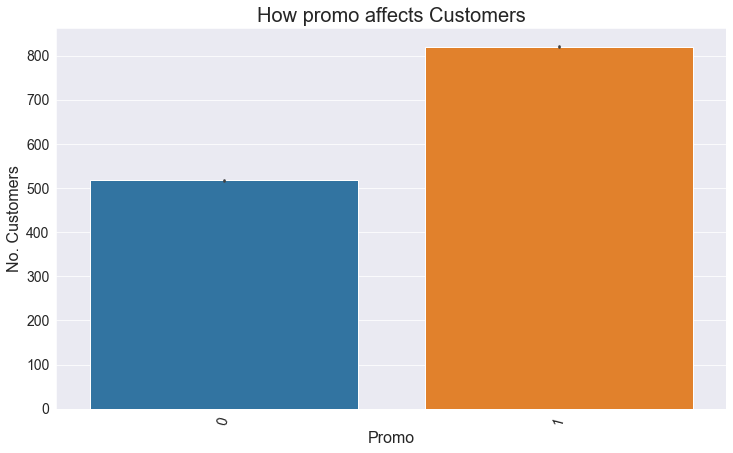

In [39]:
plot_bar(train_dup,'Promo','Customers','How promo affects Customers','Promo','No. Customers')


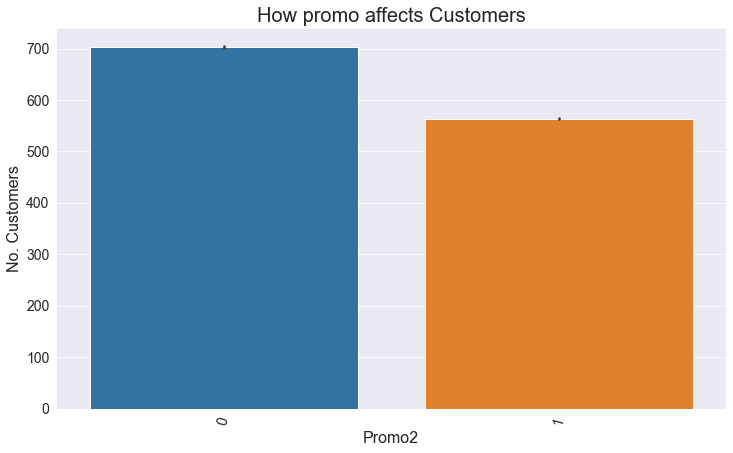

In [40]:
plot_bar(train_dup,'Promo2','Customers','How promo affects Customers','Promo2','No. Customers')


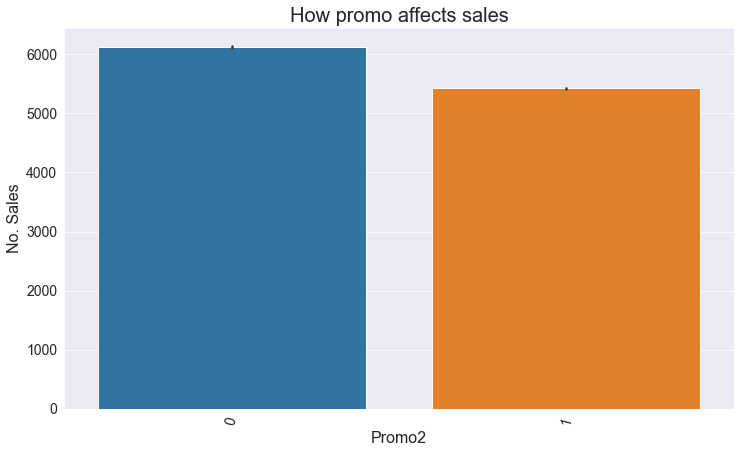

In [41]:
plot_bar(train_dup,'Promo2','Sales','How promo affects sales','Promo2','No. Sales')

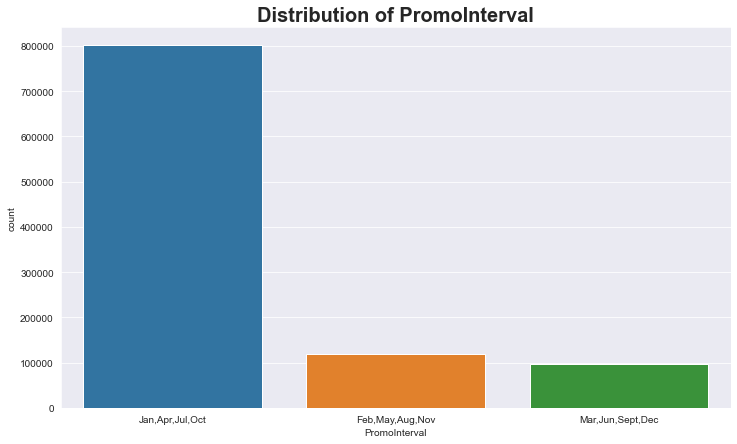

In [42]:
plot_count(train_dup,'PromoInterval')

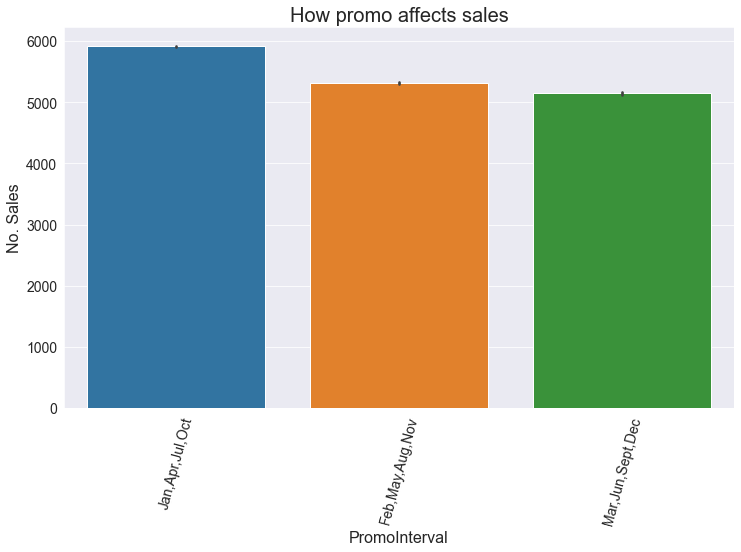

In [43]:
plot_bar(train_dup,'PromoInterval','Sales','How promo affects sales','PromoInterval','No. Sales')

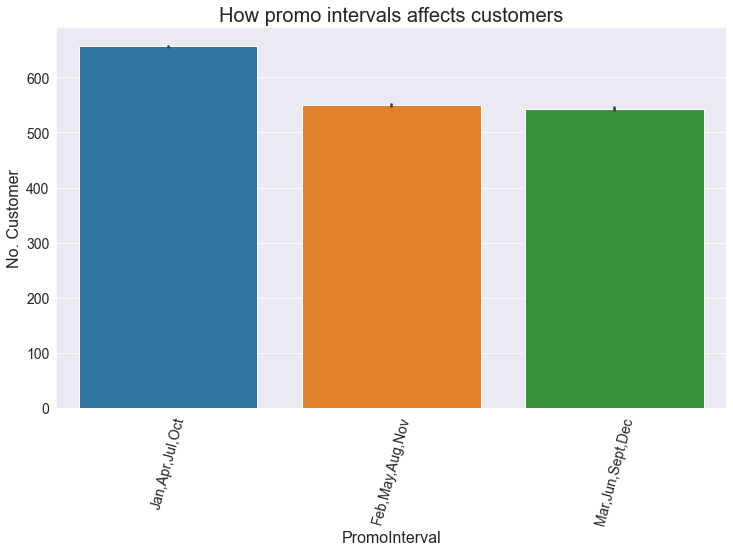

In [44]:
plot_bar(train_dup,'PromoInterval','Customers','How promo intervals affects customers','PromoInterval','No. Customer')

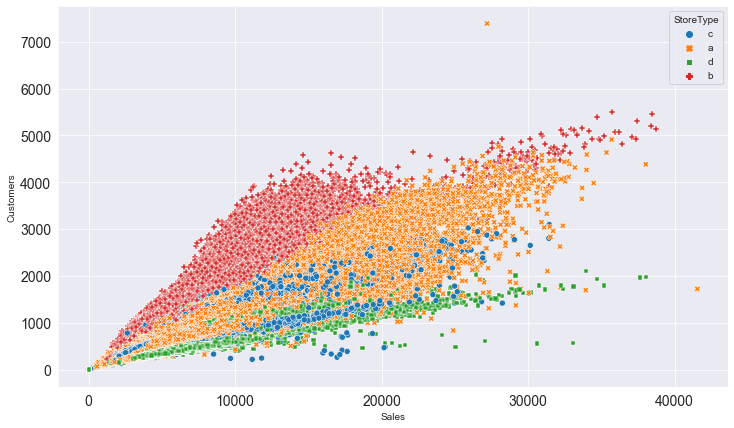

In [45]:
plot_scatter(train_dup,'Sales','Customers','','StoreType','StoreType')

Which stores are opened on all weekdays? How does that affect their sales on weekends? 

Text(0.5, 1.0, "store's open status in relation to day of the week")

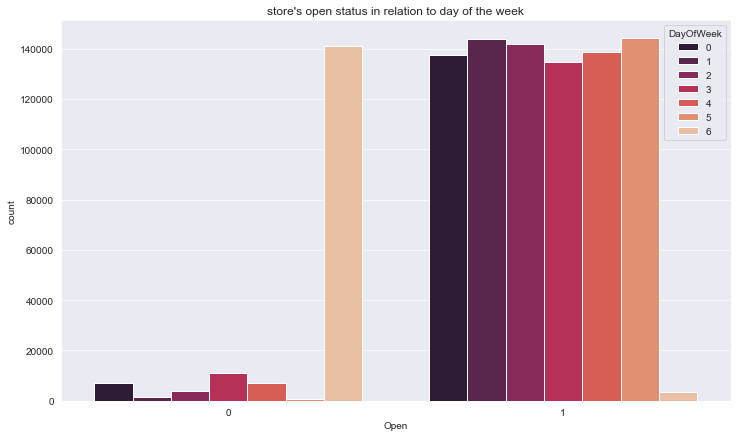

In [46]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Open',hue='DayOfWeek', data=train_dup, palette = 'rocket')
plt.title("store's open status in relation to day of the week")

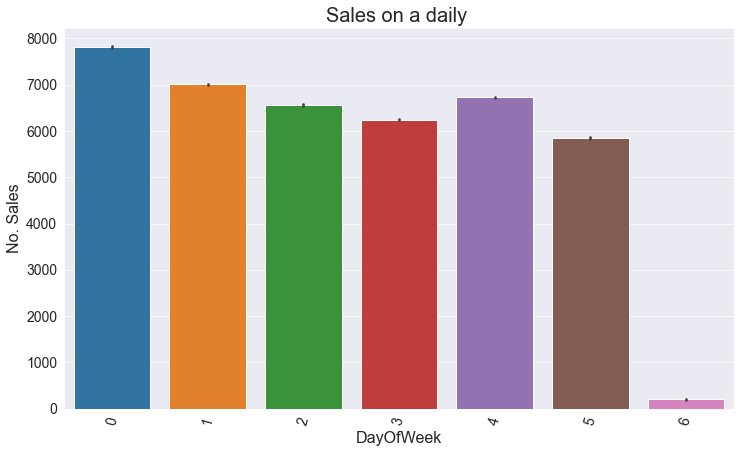

In [47]:
plot_bar(train_dup,'DayOfWeek','Sales','Sales on a daily ','DayOfWeek','No. Sales')

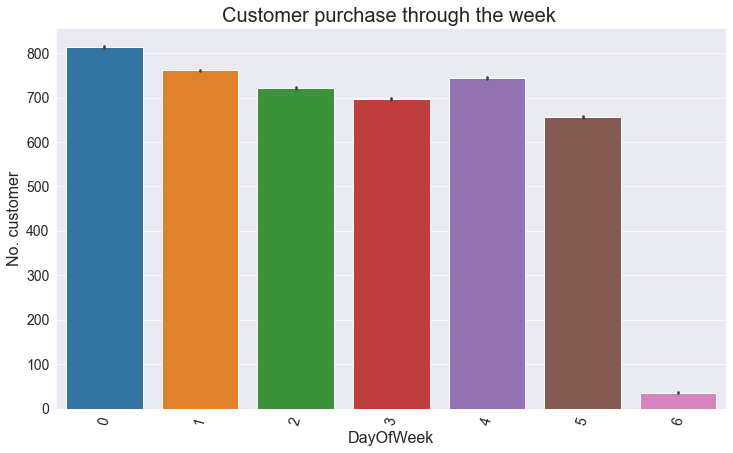

In [48]:
plot_bar(train_dup,'DayOfWeek','Customers','Customer purchase through the week ','DayOfWeek','No. customer')


● how  assortment type affects sales


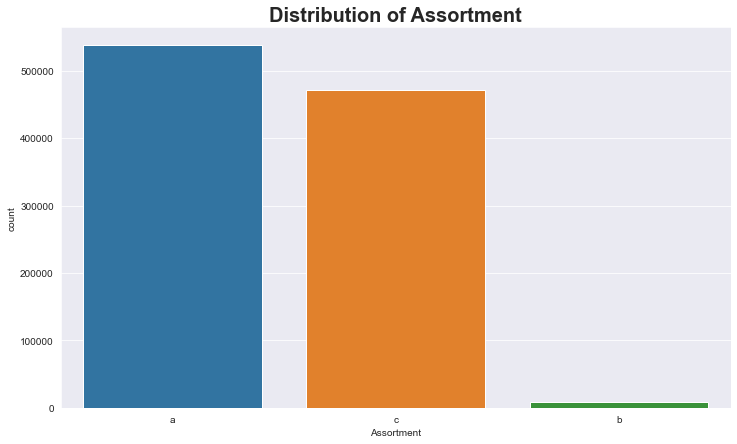

In [49]:
plot_count(train_dup,'Assortment')

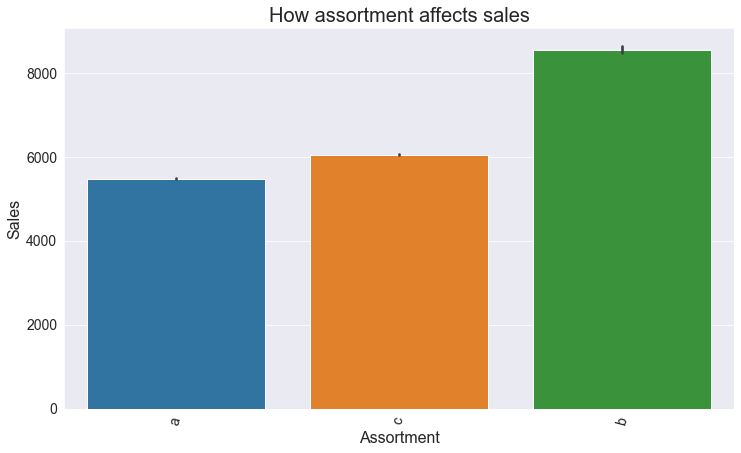

In [50]:
plot_bar(train_dup,'Assortment','Sales','How assortment affects sales','Assortment','Sales',)

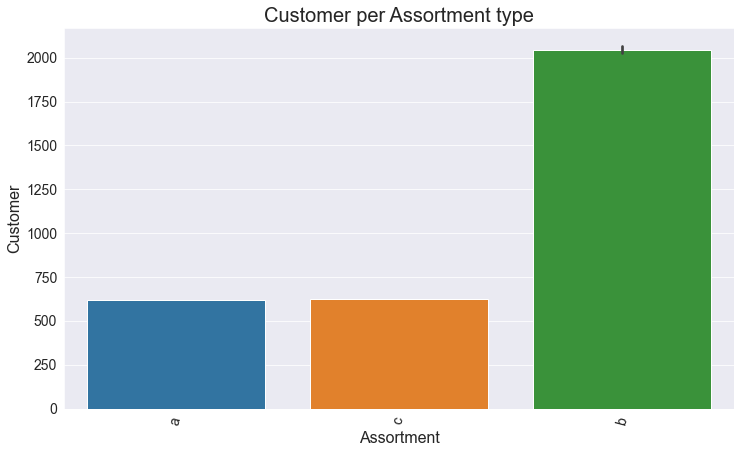

In [51]:
plot_bar(train_dup,'Assortment','Customers','Customer per Assortment type','Assortment','Customer',) 

## Seasonality

For use to check for seasonality we are going to use the .resample() function on the date and on the mean of our sales column 

e.g # Resampling the time series data based on months ,we apply it on stock close price 'M' indicates month like below

  ## monthly_resampled_data = df.close.resample('M').mean()
  
the above command will find the mean closing price ,of each month for a duration of 12 months.

in our case we resample our date column with our sales column 

Most commonly used time series frequency are –
W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

source of resampling info : https://www.geeksforgeeks.org/python-pandas-dataframe-resample/


In [52]:
season = train_dup.copy()
season

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,weekday
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,31,31,1
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,30,31,1
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,29,31,1
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,28,31,1
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,27,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,5,2013-01-05,4771,339,1,0,0,1,d,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,5,1,0
1017205,1115,4,2013-01-04,4540,326,1,0,0,1,d,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,4,1,1
1017206,1115,3,2013-01-03,4297,300,1,0,0,1,d,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,3,1,1
1017207,1115,2,2013-01-02,3697,305,1,0,0,1,d,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,2,1,1


In [53]:
season= season.set_index('Date')
season

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,c,a,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,31,31,1
2015-07-30,1,3,5020,546,1,1,0,1,c,a,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,30,31,1
2015-07-29,1,2,4782,523,1,1,0,1,c,a,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,29,31,1
2015-07-28,1,1,5011,560,1,1,0,1,c,a,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,28,31,1
2015-07-27,1,0,6102,612,1,1,0,1,c,a,...,2008.0,0,23.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,27,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1115,5,4771,339,1,0,0,1,d,c,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,5,1,0
2013-01-04,1115,4,4540,326,1,0,0,1,d,c,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,4,1,1
2013-01-03,1115,3,4297,300,1,0,0,1,d,c,...,2008.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,3,1,1


In [54]:
season.drop(season.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]], axis = 1, inplace = True)
  
season

,Sales
Date,
2015-07-31,5263
2015-07-30,5020
2015-07-29,4782
2015-07-28,5011
2015-07-27,6102
...,...
2013-01-05,4771
2013-01-04,4540
2013-01-03,4297


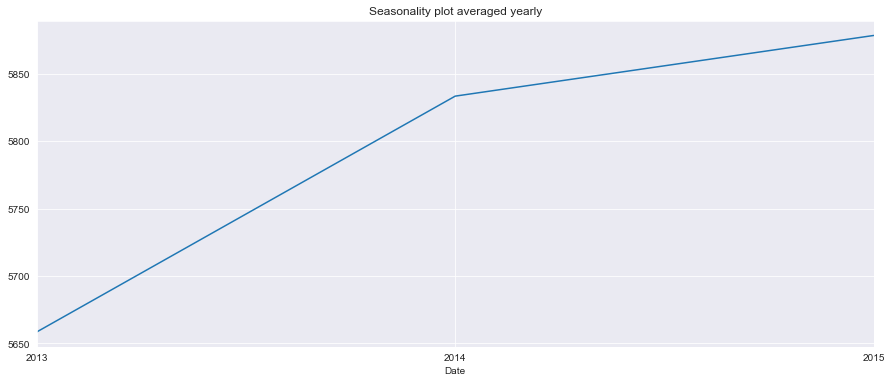

In [55]:
year = season.Sales.resample('Y').mean()
year.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged yearly')
plt.show()

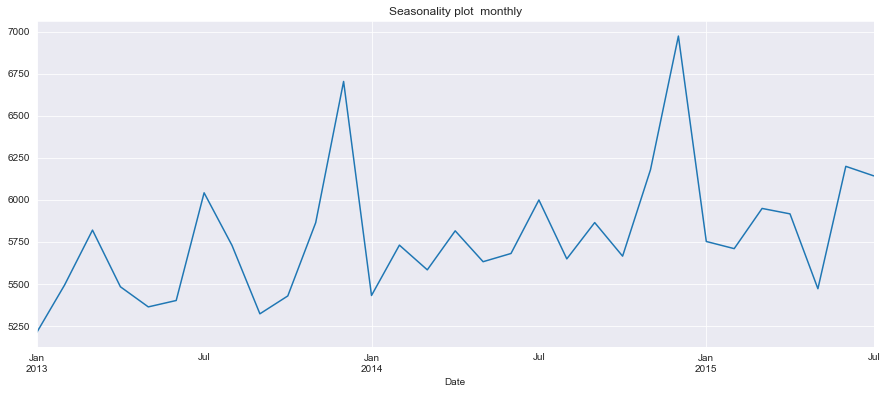

In [56]:
monthly = season.Sales.resample('M').mean()
monthly.plot(figsize=(15, 6))
plt.title('Seasonality plot  monthly')
plt.show()

From the above graph , if the data is from america we can say that the first rise represent easter thats around april , the secolnd rise around uly represents 4th of july celebrations and finally the last rise is on christmas 

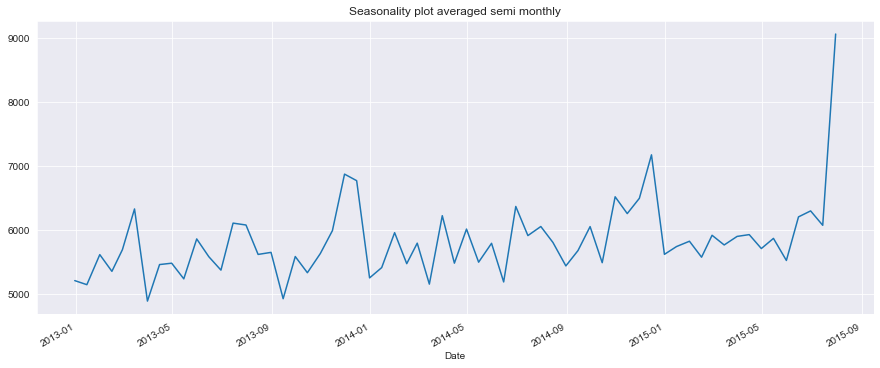

In [57]:
semi_monthly = season.Sales.resample('sM').mean()
semi_monthly.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged semi monthly')
plt.show()

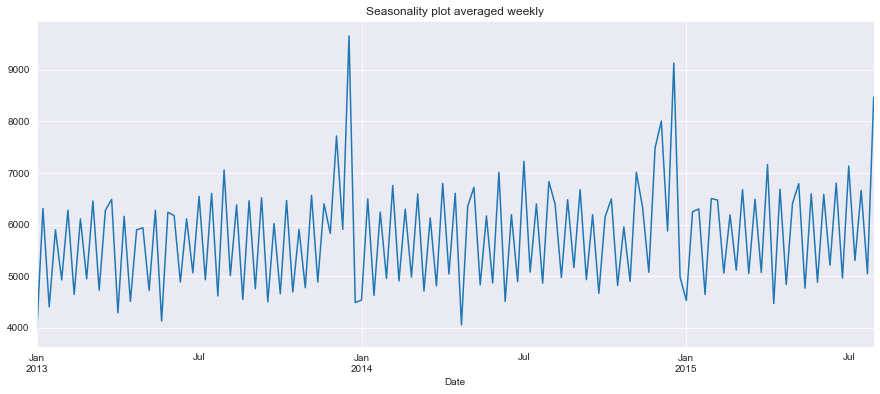

In [58]:
week = season.Sales.resample('W').mean()
week.plot(figsize=(15, 6))
plt.title('Seasonality plot averaged weekly')
plt.show()

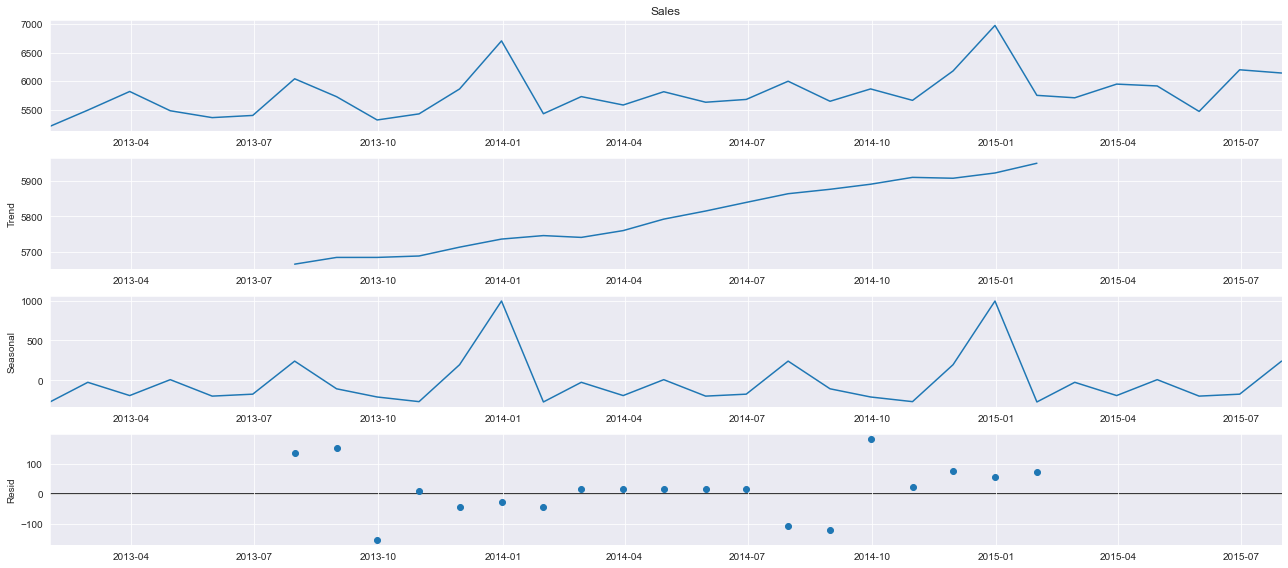

In [59]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.show()